In [1]:
import os
import pandas
import seaborn
from matplotlib import pyplot

In [2]:
d = "../data/data_folds/"

In [147]:
target = "IVV_aggmean_pct"

In [148]:
phase0_data = [f for f in os.listdir(d) if "ph0" in f]
phase0_data

['data_test_ph0_A229RX0_0.xlsx',
 'data_test_ph0_A229RX0_1.xlsx',
 'data_test_ph0_A229RX0_2.xlsx',
 'data_test_ph0_A229RX0_3.xlsx',
 'data_test_ph0_A229RX0_4.xlsx',
 'data_test_ph0_A229RX0_5.xlsx',
 'data_test_ph0_A229RX0_6.xlsx',
 'data_test_ph0_A229RX0_7.xlsx',
 'data_test_ph0_A229RX0_8.xlsx',
 'data_test_ph0_A229RX0_9.xlsx',
 'data_test_ph0_AAA_0.xlsx',
 'data_test_ph0_AAA_1.xlsx',
 'data_test_ph0_AAA_2.xlsx',
 'data_test_ph0_AAA_3.xlsx',
 'data_test_ph0_AAA_4.xlsx',
 'data_test_ph0_AAA_5.xlsx',
 'data_test_ph0_AAA_6.xlsx',
 'data_test_ph0_AAA_7.xlsx',
 'data_test_ph0_AAA_8.xlsx',
 'data_test_ph0_AAA_9.xlsx',
 'data_test_ph0_AIRRTMFMD11_0.xlsx',
 'data_test_ph0_AIRRTMFMD11_1.xlsx',
 'data_test_ph0_AIRRTMFMD11_2.xlsx',
 'data_test_ph0_AIRRTMFMD11_3.xlsx',
 'data_test_ph0_AIRRTMFMD11_4.xlsx',
 'data_test_ph0_AIRRTMFMD11_5.xlsx',
 'data_test_ph0_AIRRTMFMD11_6.xlsx',
 'data_test_ph0_AIRRTMFMD11_7.xlsx',
 'data_test_ph0_AIRRTMFMD11_8.xlsx',
 'data_test_ph0_AIRRTMFMD11_9.xlsx',
 'data_tes

In [118]:
def find_nth(haystack: str, needle: str, n: int) -> int:
    start = haystack.find(needle)
    while start >= 0 and n > 1:
        start = haystack.find(needle, start+len(needle))
        n -= 1
    return start

In [350]:
data_train, data_test = [], []
for f in phase0_data:
    data_slice = pandas.read_excel(f"{d}{f}")
    data_slice = data_slice.rename(columns={data_slice.columns[0]: "date"}).set_index("date")
    data_slice[target] = data_slice[target].shift(-1)
    role = f[find_nth(f, "_", 1)+1:find_nth(f, "_", 2)]
    fold = f[find_nth(f, "_", 4)+1:f.index(".xlsx")]
    indicator = f[find_nth(f, "_", 3)+1:find_nth(f, "_", 4)]

    corr_slice = data_slice.corr()[target]
    corr_slice = corr_slice[corr_slice.index != target]
    corr_slice = corr_slice.reset_index()

    corr_slice["fold"] = fold
    
    if role == "train":
        data_train.append(corr_slice)
    elif role == "test":
        data_test.append(corr_slice)
    else:
        raise Exception(role)
data_train = pandas.concat(data_train, axis=0, ignore_index=False)
data_test = pandas.concat(data_test, axis=0, ignore_index=False)

In [351]:
data_train = data_train.set_index("index")

In [352]:
data_test = data_test.set_index("index")

In [353]:
specific_ind = "DGDSRX1"
# specific_ind = None

In [354]:
aov = pandas.DataFrame(
    data={
        "train": data_train[target],
        "test": data_test[target],
        "tf": data_train["fold"],
        "sf": data_test["fold"],
    },
)
aov

,train,test,tf,sf
index,,,,
A229RX0__mean1x3_div_pct,-0.313704,0.092595,0,0
A229RX0__mean1x6_div_pct,-0.163234,-0.642596,0,0
A229RX0__mean1x12_div_pct,0.004724,-0.337587,0,0
A229RX0__mean3x6_div_pct,0.480636,-0.617835,0,0
A229RX0__mean3x12_div_pct,0.619620,-0.444838,0,0
...,...,...,...,...
USTRADE__predictors_linreg_lag3,0.848317,-0.111389,9,9
USTRADE__predictors_linreg_lag6,0.698104,0.048395,9,9
USTRADE__predictors_elastic_lag3,NaN,NaN,9,9


In [355]:
aov["class"] = aov.index.to_series().apply(func=lambda x: x[find_nth(x, "_", 2)+1:])
# aov["class"] = aov.index.to_series().apply(func=lambda x: x[find_nth(x, "_", 2)+1:find_nth(x, "_", 3)])
# aov["class"] = aov["class"].apply(func=lambda x: x[:x.index("x")-1] if "x" in x else x)
aov["diff"] = (aov["train"] - aov["test"]).abs()
aov["abs"] = aov["train"].abs()
aov = aov.sort_values(by="diff")
aov.head(20)

,train,test,tf,sf,class,diff,abs
index,,,,,,,
RAILFRTINTERMODAL__p901x6_div_pct,0.063253,0.063272,7,7,p901x6_div_pct,0.000018,0.063253
AWHMAN__mean1x12_quant_pct,0.132397,0.132416,5,5,mean1x12_quant_pct,0.000019,0.132397
AWHMAN__p901x12_div_pct,0.174706,0.174732,1,1,p901x12_div_pct,0.000026,0.174706
BOPGSTB__predictors_tree_dense_lag6,-0.039225,-0.039190,2,2,predictors_tree_dense_lag6,0.000035,0.039225
BAA__mean1x3_quant_pct,-0.407110,-0.407059,1,1,mean1x3_quant_pct,0.000051,0.407110
CPIAUCSL__pct_shift1,0.541160,0.541094,0,0,pct_shift1,0.000065,0.541160
EMVFINCRISES__predictors_knn_lag6,-0.177524,-0.177596,8,8,predictors_knn_lag6,0.000072,0.177524
CSUSHPINSA__std1x6_div_pct,-0.144742,-0.144667,3,3,std1x6_div_pct,0.000076,0.144742
DNRGRC1M027SBEA__p101x3_div_pct,0.083768,0.083683,5,5,p101x3_div_pct,0.000085,0.083768


In [356]:
aov["class"].unique()

array(['p901x6_div_pct', 'mean1x12_quant_pct', 'p901x12_div_pct',
       'predictors_tree_dense_lag6', 'mean1x3_quant_pct', 'pct_shift1',
       'predictors_knn_lag6', 'std1x6_div_pct', 'p101x3_div_pct',
       'pct_shift12', 'mean1x12_div_pct', 'median1x12_div_pct',
       'max1x6_div_pct', 'std3x6_div_pct', 'mean3x12_quant_pct',
       'min1x6_div_pct', 'mean6x12_quant_pct', 'predictors_arima_auto',
       'p101x6_div_pct', 'median1x3_div_pct', 'predictors_linreg_lag3',
       'predictors_forest_dense_lag3', 'max1x12_div_pct', 'binner_mimx20',
       'binner_percentile10', 'min1x3_div_pct', 'max3x6_div_pct',
       'max1x3_div_pct', 'mean3x6_div_pct', 'p103x12_div_pct',
       'predictors_forest_dense_lag6', 'binner_mimx5', 'pct_shift3',
       'predictors_knn_lag3', 'min1x12_div_pct', 'std1x3_div_pct',
       'mean3x12_div_pct', 'binner_percentile20', 'predictors_arima_ar1',
       'stayer_percentile', 'median1x6_div_pct', 'predictors_arima_ma1',
       'stayer_mimx', 'p101x12_div_p

In [357]:
bases = ['mean', 'pct', 'median', 'std', 'min', 'binner',
       'predictors', 'stayer', 'm', 'p10', 'p90']
aov = aov[aov["class"].apply(func=lambda x: any([c in x for c in bases]))]
aov

,train,test,tf,sf,class,diff,abs
index,,,,,,,
RAILFRTINTERMODAL__p901x6_div_pct,0.063253,0.063272,7,7,p901x6_div_pct,0.000018,0.063253
AWHMAN__mean1x12_quant_pct,0.132397,0.132416,5,5,mean1x12_quant_pct,0.000019,0.132397
AWHMAN__p901x12_div_pct,0.174706,0.174732,1,1,p901x12_div_pct,0.000026,0.174706
BOPGSTB__predictors_tree_dense_lag6,-0.039225,-0.039190,2,2,predictors_tree_dense_lag6,0.000035,0.039225
BAA__mean1x3_quant_pct,-0.407110,-0.407059,1,1,mean1x3_quant_pct,0.000051,0.407110
...,...,...,...,...,...,...,...
USTRADE__predictors_arima_auto,NaN,-0.173634,9,9,predictors_arima_auto,NaN,NaN
USTRADE__predictors_histboost_dense_lag3,NaN,NaN,9,9,predictors_histboost_dense_lag3,NaN,NaN
USTRADE__predictors_histboost_dense_lag6,NaN,NaN,9,9,predictors_histboost_dense_lag6,NaN,NaN


In [358]:
aov["class"].unique()

array(['p901x6_div_pct', 'mean1x12_quant_pct', 'p901x12_div_pct',
       'predictors_tree_dense_lag6', 'mean1x3_quant_pct', 'pct_shift1',
       'predictors_knn_lag6', 'std1x6_div_pct', 'p101x3_div_pct',
       'pct_shift12', 'mean1x12_div_pct', 'median1x12_div_pct',
       'max1x6_div_pct', 'std3x6_div_pct', 'mean3x12_quant_pct',
       'min1x6_div_pct', 'mean6x12_quant_pct', 'predictors_arima_auto',
       'p101x6_div_pct', 'median1x3_div_pct', 'predictors_linreg_lag3',
       'predictors_forest_dense_lag3', 'max1x12_div_pct', 'binner_mimx20',
       'binner_percentile10', 'min1x3_div_pct', 'max3x6_div_pct',
       'max1x3_div_pct', 'mean3x6_div_pct', 'p103x12_div_pct',
       'predictors_forest_dense_lag6', 'binner_mimx5', 'pct_shift3',
       'predictors_knn_lag3', 'min1x12_div_pct', 'std1x3_div_pct',
       'mean3x12_div_pct', 'binner_percentile20', 'predictors_arima_ar1',
       'stayer_percentile', 'median1x6_div_pct', 'predictors_arima_ma1',
       'stayer_mimx', 'p101x12_div_p

In [359]:
if specific_ind is not None:
    aov = aov[aov.index.to_series().apply(func=lambda x: specific_ind in x)]
aov

,train,test,tf,sf,class,diff,abs
index,,,,,,,
DGDSRX1__p901x3_div_pct,-0.062972,-0.065589,9,9,p901x3_div_pct,0.002616,0.062972
DGDSRX1__min1x12_div_pct,-0.055105,-0.049686,3,3,min1x12_div_pct,0.005419,0.055105
DGDSRX1__p101x12_div_pct,-0.150385,-0.144335,9,9,p101x12_div_pct,0.006050,0.150385
DGDSRX1__predictors_knn_lag3,-0.161141,-0.152587,7,7,predictors_knn_lag3,0.008554,0.161141
DGDSRX1__mean1x12_div_pct,-0.040429,-0.031681,3,3,mean1x12_div_pct,0.008747,0.040429
...,...,...,...,...,...,...,...
DGDSRX1__predictors_elastic_lag6,NaN,NaN,8,8,predictors_elastic_lag6,NaN,NaN
DGDSRX1__predictors_histboost_dense_lag3,NaN,NaN,9,9,predictors_histboost_dense_lag3,NaN,NaN
DGDSRX1__predictors_histboost_dense_lag6,NaN,NaN,9,9,predictors_histboost_dense_lag6,NaN,NaN


In [360]:
agg_f = "mean"
aov_gb = aov.groupby(by=["tf", "class"]).agg({"diff": agg_f, "abs": agg_f})
aov_gb = aov_gb.reset_index()
aov_gb

,tf,class,diff,abs
0,0,binner_mimx10,0.041120,0.317394
1,0,binner_mimx20,0.135283,0.411557
2,0,binner_mimx5,0.068799,0.345073
3,0,binner_percentile10,0.121346,0.397620
4,0,binner_percentile20,0.133904,0.410179
...,...,...,...,...
675,9,std1x12_div_pct,0.055839,0.059124
676,9,std1x3_div_pct,0.011283,0.079812
677,9,std1x6_div_pct,0.258183,0.144705
678,9,std3x12_div_pct,0.042738,0.136507


In [361]:
aov_diff = aov[["class", "diff", "tf"]].copy().rename(columns={"diff": "value"})
aov_diff["hue"] = "diff"
aov_abs = aov[["class", "abs", "tf"]].copy().rename(columns={"abs": "value"})
aov_abs["hue"] = "abs"
aox = pandas.concat(
    [
        aov_diff,
        aov_abs,
    ],
    axis=0,
    ignore_index=True,
)
aox

,class,value,tf,hue
0,p901x3_div_pct,0.002616,9,diff
1,min1x12_div_pct,0.005419,3,diff
2,p101x12_div_pct,0.006050,9,diff
3,predictors_knn_lag3,0.008554,7,diff
4,mean1x12_div_pct,0.008747,3,diff
...,...,...,...,...
1355,predictors_elastic_lag6,NaN,8,abs
1356,predictors_histboost_dense_lag3,NaN,9,abs
1357,predictors_histboost_dense_lag6,NaN,9,abs
1358,predictors_elastic_lag3,NaN,9,abs


In [362]:
selection = aox[aox["class"] == "binner_percentile20"]
selection

,class,value,tf,hue
68,binner_percentile20,0.078225,7,diff
95,binner_percentile20,0.109354,8,diff
107,binner_percentile20,0.128361,3,diff
115,binner_percentile20,0.133904,0,diff
125,binner_percentile20,0.138926,9,diff
216,binner_percentile20,0.236948,6,diff
384,binner_percentile20,0.434047,2,diff
448,binner_percentile20,0.512086,4,diff
548,binner_percentile20,0.713893,5,diff
576,binner_percentile20,0.806492,1,diff


<Axes: xlabel='tf', ylabel='value'>

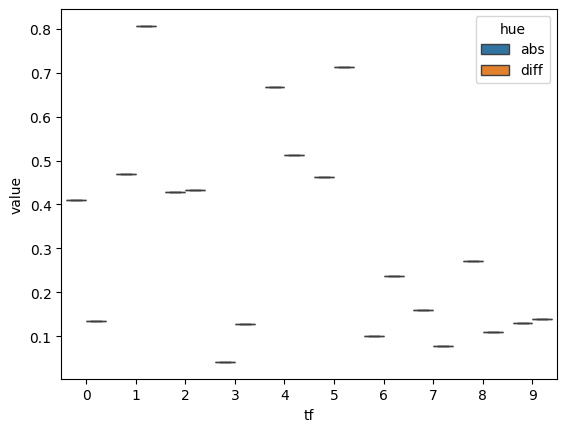

In [363]:
selection = selection.sort_values(by="tf")
seaborn.boxplot(data=selection, x="tf", y="value", hue="hue")